<a href="https://colab.research.google.com/github/Visionlogic-AI/Facial_Recognition_Projects/blob/master/FR_Project(Tawnya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [0]:
#facial detection..first step in facial recognition process
!sudo pip install mtcnn 

     |████████████████████████████████| 2.3MB 6.5MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#exmaple of loading the keras facenet model
from keras.models import load_model
from google.colab import files
uploaded= files.upload()

#load the model
model= load_model('facenet_keras.h5')
#summarize input and output shape
print(model.inputs)
print(model.outputs)

Using TensorFlow backend.


Saving facenet_keras.h5 to facenet_keras.h5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '



1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)


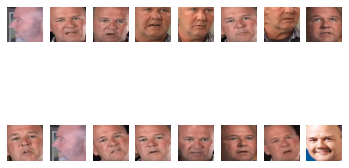

In [0]:
#first we must demonstrate face detection
#real code
from os import listdir
from os.path import isdir
from numpy import savez_compressed
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN


#extract a single face from a given photo
def extract_face(filename, required_size=(160,160)):
  #load image from file
  image= Image.open(filename)
  #convert to RGB if needed
  image= image.convert('RGB')
  #convert to array
  pixels= asarray(image)
  #create the detector , using the default weights
  detector= MTCNN()
  #detect faces in image
  results= detector.detect_faces(pixels)
  #extract the bounding box from the first face
  x1, y1, width, height= results[0]['box']
  #bug fix
  x1, y1= abs(x1), abs(y1)
  x2, y2= x1 + width, y1 + height
  #extract the face
  face= pixels[y1:y2, x1:x2]
  #resize pixels to model size
  image= Image.fromarray(face)
  image= image.resize(required_size)
  face_array= asarray(image)
  return face_array

#specify folder to plot
folder= '/content/drive/My Drive/Image Datasets/Tawnya_Images/Train/Aaron/'
i= 1
#enumrate files
for filename in listdir(folder):
  #path
  path= folder + filename
  #get face
  face= extract_face(path)
  print(i, face.shape)
  #plot
  pyplot.subplot(2,8,i)
  pyplot.axis('off')
  pyplot.imshow(face)
  i += 1
pyplot.show()

#so far so good. Lets continue

In [0]:
#complete code example
#face detection for Tawyna's Dataset
import numpy as np
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

#extract a single face from a given photo
def extract_face(filename, required_size=(160, 160)):
  #load image from file
  image = Image.open(filename)
  #convert if RGB if needed
  image= image.convert('RGB')
  #convert to array
  pixels= asarray(image)
  #create the detector using default weights
  detector = MTCNN()
  #detect faces in the image
  results= detector.detect_faces(pixels)
  #extract the bounding box from the first face
  x1, y1, width, height= results[0]['box']
  #bug fix
  x1, y1= abs(x1), abs(y1)
  x2, y2= x1 + width, y1 + height
  #extract the face
  face= pixels[y1:y2, x1:x2]
  #resize pixels to the model size
  image= Image.fromarray(face)
  image= image.resize(required_size)
  face_array= asarray(image)
  return face_array

#load images and extract faces for all images in a directory 
def load_faces(directory):
  faces = list()
  #enumrate files
  for filename in listdir(directory):
    #path
    path= directory + filename
    #get face
    face = extract_face(path)
    #store
    faces.append(face)
  return faces

#load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
  X, y= list(), list()
  #enumerate folders, on per class
  for subdir in listdir(directory):
    #path
    path= directory + subdir + '/'
    #skip any files that might be in the dir
    if not isdir(path):
      continue
    #oad all faces in the subdirectory
    faces= load_faces(path)
    #create labels
    labels= [subdir for _ in range(len(faces))]
    #summarize progress 
    print('>loaded %d examples for class: %s' % (len(faces), subdir))
    #store
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)

#load training dataset 
trainx, trainy= load_dataset('/content/drive/My Drive/Image Datasets/Tawnya_Images/Train/')
#trainx2, trainy2= load_dataset('/content/drive/My Drive/Image Datasets/Tawnya_Images/Train/Marc/')
print(trainx.shape, trainy.shape)
#print(trainx2.shape, trainy2.shape)

#load test dataset
testx, testy= load_dataset('/content/drive/My Drive/Image Datasets/Tawnya_Images/Val/')

>loaded 16 examples for class: Aaron
>loaded 3 examples for class: Marc
(19, 160, 160, 3) (19,)
>loaded 3 examples for class: Marc
>loaded 11 examples for class: Aaron


In [0]:
#save arrays to one file in compressed format
savez_compressed('/content/drive/My Drive/Tawnya_Images_dataset.npz', trainx, trainy, testx, testy)

In [0]:
#calculate a face embedding for each face in the dataset using facenet
import numpy as np
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

#get the face embedding for one face
def get_embedding(model, face_pixels):
  #scale pixel values
  face_pixels= face_pixels.astype('float32')
  #standardize pixel values across all global channels
  mean, std= face_pixels.mean(), face_pixels.std()
  face_pixels= (face_pixels - mean) /std
  #transform face into one sample
  samples= expand_dims(face_pixels, axis= 0)
  #make predictions to get embeddings 
  yhat= model.predict(samples)
  return yhat[0]

#time for face embedding
#load face datatset
data= load("/content/drive/My Drive/Tawnya_Images_dataset.npz")
trainx, trainy, testx, testy= data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded:',trainx.shape, trainy.shape, testx.shape, testy.shape)
#load facenet model
model= load_model('/content/drive/My Drive/Data/facenet_keras.h5')
print('Loaded Model')

#convert each image in the training set to an embedding
newTrainx= list()
for face_pixels in trainx:
  embedding= get_embedding(model, face_pixels)
  newTrainx.append(embedding)
newTrainx= asarray(newTrainx)
print(newTrainx.shape)

#convert each face in the test set to an embedding
newTestx= list()
for face_pixels in testx:
  embedding= get_embedding(model, face_pixels)
  newTestx.append(embedding)
newTestx= asarray(newTestx)
print(newTestx.shape)

#save arrays to one file in a compressed format
savez_compressed('/content/drive/My Drive/Tawnya_Images-embeddings.npz', newTrainx, trainy, newTestx, testy)

Loaded: (19, 160, 160, 3) (19,) (14, 160, 160, 3) (14,)


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
(19, 128)
(14, 128)


Dataset: train=19, test=14
Accuracy: train=100.000, test= 100.000
Predicted: Aaron (95.565)
Expected: Aaron


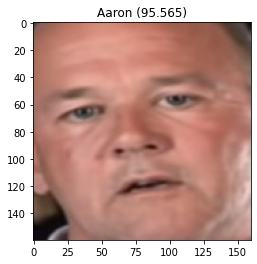

In [0]:
#develop a classifier for the dataset
from random import choice
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

#load faces
data= load('/content/drive/My Drive/Tawnya_Images_dataset.npz')  #npz file
testx_faces= data['arr_2']
#load face embeddings
data= load('/content/drive/My Drive/Tawnya_Images-embeddings.npz')    #this is the npz dataset that was trained
trainx, trainy, testx, testy= data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainx.shape[0], testx.shape[0]))
#normalize input vectors
in_encoder= Normalizer(norm= 'l2')
trainx= in_encoder.transform(trainx)
testx= in_encoder.transform(testx)
#label encode targets
out_encoder= LabelEncoder()
out_encoder.fit(trainy)
trainy= out_encoder.transform(trainy)
testy= out_encoder.transform(testy)
#fit model
model= SVC(kernel= 'linear', probability= True)
model.fit(trainx, trainy)
#predict
yhat_train= model.predict(trainx)
yhat_test= model.predict(testx)
#score
score_train= accuracy_score(trainy, yhat_train)
score_test= accuracy_score(testy, yhat_test)
#summarize
print('Accuracy: train=%.3f, test= %.3f' % (score_train * 100, score_test * 100))
#test model on random example from the test dataset
selection= choice([i for i in range(testx.shape[0])])
random_face_pixels= testx_faces[selection]
random_face_emb= testx[selection]
random_face_class= testy[selection]
random_face_name= out_encoder.inverse_transform([random_face_class])
#prediction for the face
samples= expand_dims(random_face_emb, axis=0)
yhat_class= model.predict(samples)
yhat_prob= model.predict_proba(samples)
#get name
class_index= yhat_class[0]
class_probability= yhat_prob[0, class_index] * 100
predict_names= out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
#plot for fun
pyplot.imshow(random_face_pixels)
title= '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()